In [1]:
# We'll use NetworkX to represent graphs in python
import networkx as nx
# You may need to `pip install networkx`

# https://networkx.github.io/documentation/stable/tutorial.html

In [2]:

# You can use it like the following:

G = nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=4)
G.add_edge(3, 4, weight=1)

# Now we have a graph

for out in G[1]:
    print("Edge between 1 and", out, "of weight", G[1][out]['weight'])

Edge between 1 and 2 of weight 2
Edge between 1 and 3 of weight 4


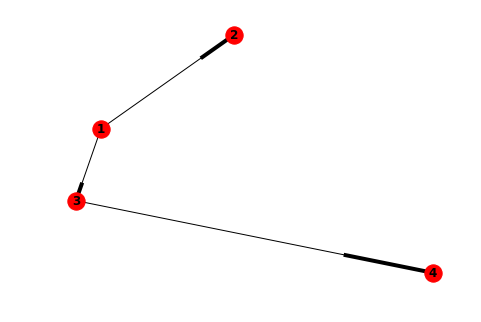

In [3]:
# You can also draw them

import pylab
%matplotlib inline

nx.draw(G, with_labels=True, font_weight='bold')

# the thicker end is the endpoint of a directed edge.

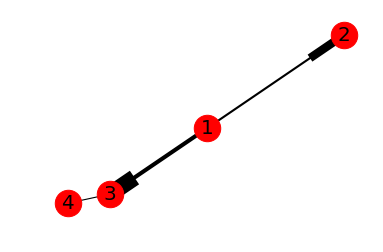

In [4]:
# Let's give ourselves the ability to visualize weighted graphs

def draw_with_weights(G, weightcol='weight', scale=1, pos=None):
    edgelist = [(u,v, d[weightcol]) for (u, v, d) in G.edges(data=True)]
    if pos is None:
        pos=nx.spring_layout(G) # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v) for (u, v, w) in edgelist],
                        width=[w*scale+0.1 for (u, v, w) in edgelist], arrows=True)
#nx.draw_networkx_edges(G,pos,edgelist=esmall,
#                    width=6,alpha=0.5,edge_color='b',style='dashed')

    # labels
    nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
    pylab.axis('off')

draw_with_weights(G)

In [5]:
# Let's make a function to construct the directed graph corresponding to interval scheduling.

def interval_scheduling_graph(I):
    """Input: a list of (start time, finish time, weight) pairs.
    
    Output: a graph for which the longest path from 's' to 't' corresponds to the maximal value interval schedule.
    """
    
    #Sort by start time
    I.sort()
    
    G = nx.DiGraph()
    # Construct the nodes: one per interval + special source s, sink t.
    G.add_node('s')
    G.add_nodes_from(range(len(I)))
    G.add_node('t')
    for i in range(len(I)):
        G.add_edge('s', i, weight=I[i][2])
        G.add_edge(i, 't', weight=0)
        for j in range(i+1, len(I)):
            if I[i][1] <= I[j][0]: # Second interval starts after first finishes
                G.add_edge(i, j, weight=I[j][2])
    return G

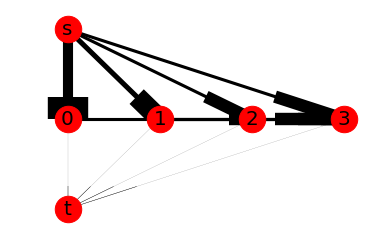

In [6]:
I = [(1,6, 10),
      (2,4, 5),
      (4,5, 3),
       (7,8, 3),
    ]
smallG = interval_scheduling_graph(I)
prettier_positions = {i:(i, 0) for i in range(len(I))}
prettier_positions.update({'s':(0,1), 't': (0, -1)}) 
draw_with_weights(smallG, pos=prettier_positions)

In [7]:
def cheating_longest_path(G, source, target):
    """This is a cheating way of getting the longest path."""
    G = nx.DiGraph(G)
    for u,v,d in G.edges(data=True):
        d['negweight'] = -d['weight']
    try:
        return (-nx.shortest_path_length(G, source, target, weight='negweight'),
                nx.shortest_path(G, source, target, weight='negweight'))
    except nx.exception.NetworkXNoPath:
        return (None, [])

In [8]:
cheating_longest_path(smallG, 's', 't')


(13, ['s', 0, 3, 't'])

In [9]:
# Problem 1:  Implement longest_path without cheating, in O(n log n + m) time.
# You may assume that, other than source and target,
# the longest path goes in order of increasing node id.

def longest_path(G, source, target):
    all_nodes = list(G.nodes())
    all_nodes.remove(source)
    all_nodes.remove(target)
    ordered_nodes = [source] + sorted(all_nodes) + [target]
    
    distance = {}
    back = {}
    ...
    # eventually return (distance to target, path to target)
    

In [10]:
longest_path(smallG, 's', 't')
# this should be the same as the result of cheating_longest_path.

(13, ['s', 0, 3, 't'])

In [11]:
# Let's stress test
I = [(x, x+1, 1) for x in range(300)
    ]
largeG = interval_scheduling_graph(I)
print(longest_path(largeG, 's', 't')[0], 'should equal', len(I))

import random
starts = [random.randint(1, 10000) for _ in range(1000)]
I = [(s, s+random.randint(1, 10000), random.randint(1, 10000)) for s in starts]
randomG = interval_scheduling_graph(I)
longest_path(randomG, 's', 't')



300 should equal 300


(177033,
 ['s',
  8,
  59,
  82,
  133,
  191,
  226,
  250,
  305,
  326,
  361,
  446,
  495,
  527,
  544,
  551,
  554,
  584,
  625,
  687,
  711,
  749,
  797,
  876,
  937,
  979,
  997,
  't'])

In [12]:
# Problem 2:
# You are going on a road trip along Historic Route 66.
# This will take several days.  On any given day, you are willing
# to drive up to M miles.  At various mile markers, there are hotels.
# Each hotel has a certain price for staying at it.
# Given the locations and prices of the hotels, find the cheapest way
# to get to your final destination -- the farthest hotel, which you do not
# need to pay for.
# The only cost of your trip is hotel rooms; there is no need to rush
# the trip other than to avoid hotel stays.

example_input = [100, # M
                 [(50, 30), # (distance from origin, cost) of hotel
                  (80, 31),
                  (140, 40),
                  (200, 20),
                  ]]

# Solution for this input: stay at the hotels at mile markers 50 and 140, for 70 total cost.


In [21]:
# Transform this problem into an instance of shortest paths on a directed graph.
# Implement this function, and prove that the shortest path on the resulting graph 
# gives the optimal solution to the original problem.


def graph_from_input(M, hotels):
    G = nx.DiGraph()
    ...
    return G


In [22]:
# Test your function.
G = graph_from_input(*example_input)
print(nx.shortest_path_length(G, 's', 't', weight='weight')) # Should return 70


70
